Code to show a usecase of SAC on a Pendulum environment

In [1]:
import gymnasium as gym
import os

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO, DDPG, SAC
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [2]:
env = gym.make("Pendulum-v1")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.shape)
print("Action Space Sample", env.action_space.sample()) # Take a random action
print("Action Space High", env.action_space.high) # Get the highest action value
print("Action Space Low", env.action_space.low) # Get the lowest action value

_____OBSERVATION SPACE_____ 

Observation Space Shape (3,)
Sample observation [ 0.10478652 -0.64077777 -5.1381054 ]

 _____ACTION SPACE_____ 

Action Space Shape (1,)
Action Space Sample [-0.6052849]
Action Space High [2.]
Action Space Low [-2.]


## Create the Model
- We are using an existing Deep RL library to set up the SAC algorithm and model, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

In [16]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

sac_model = SAC(
    policy='MlpPolicy',
    env=env,
    learning_rate=1e-3,
    buffer_size=2000000,
    learning_starts=60000,
    gamma=0.98,
    tau=0.01,
    ent_coef='auto_0.1',
    train_freq=(2,'episode'),
    verbose=1,
    seed=42)

sac_model.learn(total_timesteps=1e6, log_interval=100, progress_bar=True)
# Save the model
model_name = "sac-Pendulum-v1-ex3"
sac_model.save(model_name)

Output()

Using cpu device
Wrapping the env in a DummyVecEnv.


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.21e+03 |
| time/              |           |
|    episodes        | 100       |
|    fps             | 16384     |
|    time_elapsed    | 1         |
|    total_timesteps | 20000     |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.25e+03 |
| time/              |           |
|    episodes        | 200       |
|    fps             | 16756     |
|    time_elapsed    | 2         |
|    total_timesteps | 40000     |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.29e+03 |
| time/              |           |
|    episodes        | 300       |
|    fps             | 16708     |
|    time_elapsed    | 3         |
|    total_timesteps | 60000     |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.41e+03 |
| time/              |           |
|    episodes        | 400       |
|    fps             | 10216     |
|    time_elapsed    | 7         |
|    total_timesteps | 80000     |
| train/             |           |
|    actor_loss      | 8.39      |
|    critic_loss     | 2.14      |
|    ent_coef        | 0.0955    |
|    ent_coef_loss   | -3.2      |
|    learning_rate   | 0.001     |
|    n_updates       | 49        |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.43e+03 |
| time/              |           |
|    episodes        | 500       |
|    fps             | 8315      |
|    time_elapsed    | 12        |
|    total_timesteps | 100000    |
| train/             |           |
|    actor_loss      | 10.6      |
|    critic_loss     | 0.683     |
|    ent_coef        | 0.091     |
|    ent_coef_loss   | -2.7      |
|    learning_rate   | 0.001     |
|    n_updates       | 99        |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.73e+03 |
| time/              |           |
|    episodes        | 600       |
|    fps             | 7367      |
|    time_elapsed    | 16        |
|    total_timesteps | 120000    |
| train/             |           |
|    actor_loss      | 13.9      |
|    critic_loss     | 0.382     |
|    ent_coef        | 0.0871    |
|    ent_coef_loss   | -2.52     |
|    learning_rate   | 0.001     |
|    n_updates       | 149       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.71e+03 |
| time/              |           |
|    episodes        | 700       |
|    fps             | 6833      |
|    time_elapsed    | 20        |
|    total_timesteps | 140000    |
| train/             |           |
|    actor_loss      | 17        |
|    critic_loss     | 0.296     |
|    ent_coef        | 0.0833    |
|    ent_coef_loss   | -2.39     |
|    learning_rate   | 0.001     |
|    n_updates       | 199       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.72e+03 |
| time/              |           |
|    episodes        | 800       |
|    fps             | 6475      |
|    time_elapsed    | 24        |
|    total_timesteps | 160000    |
| train/             |           |
|    actor_loss      | 20.4      |
|    critic_loss     | 0.245     |
|    ent_coef        | 0.0799    |
|    ent_coef_loss   | -2.63     |
|    learning_rate   | 0.001     |
|    n_updates       | 249       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.69e+03 |
| time/              |           |
|    episodes        | 900       |
|    fps             | 6236      |
|    time_elapsed    | 28        |
|    total_timesteps | 180000    |
| train/             |           |
|    actor_loss      | 23.3      |
|    critic_loss     | 0.209     |
|    ent_coef        | 0.0767    |
|    ent_coef_loss   | -2.44     |
|    learning_rate   | 0.001     |
|    n_updates       | 299       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.64e+03 |
| time/              |           |
|    episodes        | 1000      |
|    fps             | 6057      |
|    time_elapsed    | 33        |
|    total_timesteps | 200000    |
| train/             |           |
|    actor_loss      | 26.3      |
|    critic_loss     | 0.139     |
|    ent_coef        | 0.0736    |
|    ent_coef_loss   | -2.81     |
|    learning_rate   | 0.001     |
|    n_updates       | 349       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.58e+03 |
| time/              |           |
|    episodes        | 1100      |
|    fps             | 5918      |
|    time_elapsed    | 37        |
|    total_timesteps | 220000    |
| train/             |           |
|    actor_loss      | 30.4      |
|    critic_loss     | 0.153     |
|    ent_coef        | 0.071     |
|    ent_coef_loss   | -1.96     |
|    learning_rate   | 0.001     |
|    n_updates       | 399       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.53e+03 |
| time/              |           |
|    episodes        | 1200      |
|    fps             | 5806      |
|    time_elapsed    | 41        |
|    total_timesteps | 240000    |
| train/             |           |
|    actor_loss      | 34        |
|    critic_loss     | 0.141     |
|    ent_coef        | 0.0688    |
|    ent_coef_loss   | -1.47     |
|    learning_rate   | 0.001     |
|    n_updates       | 449       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.47e+03 |
| time/              |           |
|    episodes        | 1300      |
|    fps             | 5717      |
|    time_elapsed    | 45        |
|    total_timesteps | 260000    |
| train/             |           |
|    actor_loss      | 36.9      |
|    critic_loss     | 0.154     |
|    ent_coef        | 0.0671    |
|    ent_coef_loss   | -0.497    |
|    learning_rate   | 0.001     |
|    n_updates       | 499       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.39e+03 |
| time/              |           |
|    episodes        | 1400      |
|    fps             | 5642      |
|    time_elapsed    | 49        |
|    total_timesteps | 280000    |
| train/             |           |
|    actor_loss      | 40.1      |
|    critic_loss     | 0.189     |
|    ent_coef        | 0.0661    |
|    ent_coef_loss   | -0.0778   |
|    learning_rate   | 0.001     |
|    n_updates       | 549       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.36e+03 |
| time/              |           |
|    episodes        | 1500      |
|    fps             | 5579      |
|    time_elapsed    | 53        |
|    total_timesteps | 300000    |
| train/             |           |
|    actor_loss      | 42        |
|    critic_loss     | 0.132     |
|    ent_coef        | 0.0656    |
|    ent_coef_loss   | -0.298    |
|    learning_rate   | 0.001     |
|    n_updates       | 599       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.34e+03 |
| time/              |           |
|    episodes        | 1600      |
|    fps             | 5524      |
|    time_elapsed    | 57        |
|    total_timesteps | 320000    |
| train/             |           |
|    actor_loss      | 46.2      |
|    critic_loss     | 0.163     |
|    ent_coef        | 0.0656    |
|    ent_coef_loss   | 0.00838   |
|    learning_rate   | 0.001     |
|    n_updates       | 649       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.32e+03 |
| time/              |           |
|    episodes        | 1700      |
|    fps             | 5477      |
|    time_elapsed    | 62        |
|    total_timesteps | 340000    |
| train/             |           |
|    actor_loss      | 46.9      |
|    critic_loss     | 0.329     |
|    ent_coef        | 0.0662    |
|    ent_coef_loss   | 0.718     |
|    learning_rate   | 0.001     |
|    n_updates       | 699       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.27e+03 |
| time/              |           |
|    episodes        | 1800      |
|    fps             | 5435      |
|    time_elapsed    | 66        |
|    total_timesteps | 360000    |
| train/             |           |
|    actor_loss      | 51.9      |
|    critic_loss     | 0.371     |
|    ent_coef        | 0.0673    |
|    ent_coef_loss   | 0.985     |
|    learning_rate   | 0.001     |
|    n_updates       | 749       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.26e+03 |
| time/              |           |
|    episodes        | 1900      |
|    fps             | 5398      |
|    time_elapsed    | 70        |
|    total_timesteps | 380000    |
| train/             |           |
|    actor_loss      | 51.8      |
|    critic_loss     | 0.18      |
|    ent_coef        | 0.0688    |
|    ent_coef_loss   | 0.642     |
|    learning_rate   | 0.001     |
|    n_updates       | 799       |
----------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.2e+03 |
| time/              |          |
|    episodes        | 2000     |
|    fps             | 5366     |
|    time_elapsed    | 74       |
|    total_timesteps | 400000   |
| train/             |          |
|    actor_loss      | 57.1     |
|    critic_loss     | 0.161    |
|    ent_coef        | 0.0707   |
|    ent_coef_loss   | 1.08     |
|    learning_rate   | 0.001    |
|    n_updates       | 849      |
---------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.14e+03 |
| time/              |           |
|    episodes        | 2100      |
|    fps             | 5337      |
|    time_elapsed    | 78        |
|    total_timesteps | 420000    |
| train/             |           |
|    actor_loss      | 58.3      |
|    critic_loss     | 0.217     |
|    ent_coef        | 0.073     |
|    ent_coef_loss   | 1.65      |
|    learning_rate   | 0.001     |
|    n_updates       | 899       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.12e+03 |
| time/              |           |
|    episodes        | 2200      |
|    fps             | 5311      |
|    time_elapsed    | 82        |
|    total_timesteps | 440000    |
| train/             |           |
|    actor_loss      | 59.1      |
|    critic_loss     | 0.162     |
|    ent_coef        | 0.0758    |
|    ent_coef_loss   | 1.37      |
|    learning_rate   | 0.001     |
|    n_updates       | 949       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.06e+03 |
| time/              |           |
|    episodes        | 2300      |
|    fps             | 5287      |
|    time_elapsed    | 86        |
|    total_timesteps | 460000    |
| train/             |           |
|    actor_loss      | 61.7      |
|    critic_loss     | 0.235     |
|    ent_coef        | 0.0789    |
|    ent_coef_loss   | 1.32      |
|    learning_rate   | 0.001     |
|    n_updates       | 999       |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.04e+03 |
| time/              |           |
|    episodes        | 2400      |
|    fps             | 5259      |
|    time_elapsed    | 91        |
|    total_timesteps | 480000    |
| train/             |           |
|    actor_loss      | 66        |
|    critic_loss     | 0.274     |
|    ent_coef        | 0.0824    |
|    ent_coef_loss   | 1.44      |
|    learning_rate   | 0.001     |
|    n_updates       | 1049      |
----------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -975     |
| time/              |          |
|    episodes        | 2500     |
|    fps             | 5239     |
|    time_elapsed    | 95       |
|    total_timesteps | 500000   |
| train/             |          |
|    actor_loss      | 66.7     |
|    critic_loss     | 0.352    |
|    ent_coef        | 0.0862   |
|    ent_coef_loss   | 1.2      |
|    learning_rate   | 0.001    |
|    n_updates       | 1099     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -934     |
| time/              |          |
|    episodes        | 2600     |
|    fps             | 5221     |
|    time_elapsed    | 99       |
|    total_timesteps | 520000   |
| train/             |          |
|    actor_loss      | 68.1     |
|    critic_loss     | 0.184    |
|    ent_coef        | 0.0904   |
|    ent_coef_loss   | 1.57     |
|    learning_rate   | 0.001    |
|    n_updates       | 1149     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -859     |
| time/              |          |
|    episodes        | 2700     |
|    fps             | 5204     |
|    time_elapsed    | 103      |
|    total_timesteps | 540000   |
| train/             |          |
|    actor_loss      | 69.1     |
|    critic_loss     | 0.356    |
|    ent_coef        | 0.0947   |
|    ent_coef_loss   | 1.25     |
|    learning_rate   | 0.001    |
|    n_updates       | 1199     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -796     |
| time/              |          |
|    episodes        | 2800     |
|    fps             | 5189     |
|    time_elapsed    | 107      |
|    total_timesteps | 560000   |
| train/             |          |
|    actor_loss      | 67.2     |
|    critic_loss     | 0.336    |
|    ent_coef        | 0.0994   |
|    ent_coef_loss   | 0.905    |
|    learning_rate   | 0.001    |
|    n_updates       | 1249     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -689     |
| time/              |          |
|    episodes        | 2900     |
|    fps             | 5175     |
|    time_elapsed    | 112      |
|    total_timesteps | 580000   |
| train/             |          |
|    actor_loss      | 70.6     |
|    critic_loss     | 0.342    |
|    ent_coef        | 0.104    |
|    ent_coef_loss   | 1.62     |
|    learning_rate   | 0.001    |
|    n_updates       | 1299     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -526     |
| time/              |          |
|    episodes        | 3000     |
|    fps             | 5162     |
|    time_elapsed    | 116      |
|    total_timesteps | 600000   |
| train/             |          |
|    actor_loss      | 73.9     |
|    critic_loss     | 0.42     |
|    ent_coef        | 0.109    |
|    ent_coef_loss   | 1.27     |
|    learning_rate   | 0.001    |
|    n_updates       | 1349     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -562     |
| time/              |          |
|    episodes        | 3100     |
|    fps             | 5151     |
|    time_elapsed    | 120      |
|    total_timesteps | 620000   |
| train/             |          |
|    actor_loss      | 73.9     |
|    critic_loss     | 0.239    |
|    ent_coef        | 0.114    |
|    ent_coef_loss   | 1.01     |
|    learning_rate   | 0.001    |
|    n_updates       | 1399     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -393     |
| time/              |          |
|    episodes        | 3200     |
|    fps             | 5139     |
|    time_elapsed    | 124      |
|    total_timesteps | 640000   |
| train/             |          |
|    actor_loss      | 76.4     |
|    critic_loss     | 0.233    |
|    ent_coef        | 0.119    |
|    ent_coef_loss   | 1.12     |
|    learning_rate   | 0.001    |
|    n_updates       | 1449     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -355     |
| time/              |          |
|    episodes        | 3300     |
|    fps             | 5128     |
|    time_elapsed    | 128      |
|    total_timesteps | 660000   |
| train/             |          |
|    actor_loss      | 75.8     |
|    critic_loss     | 0.238    |
|    ent_coef        | 0.124    |
|    ent_coef_loss   | 1.33     |
|    learning_rate   | 0.001    |
|    n_updates       | 1499     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -262     |
| time/              |          |
|    episodes        | 3400     |
|    fps             | 5118     |
|    time_elapsed    | 132      |
|    total_timesteps | 680000   |
| train/             |          |
|    actor_loss      | 72.3     |
|    critic_loss     | 0.622    |
|    ent_coef        | 0.129    |
|    ent_coef_loss   | 1.12     |
|    learning_rate   | 0.001    |
|    n_updates       | 1549     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -226     |
| time/              |          |
|    episodes        | 3500     |
|    fps             | 5109     |
|    time_elapsed    | 136      |
|    total_timesteps | 700000   |
| train/             |          |
|    actor_loss      | 75.8     |
|    critic_loss     | 0.318    |
|    ent_coef        | 0.135    |
|    ent_coef_loss   | 1.15     |
|    learning_rate   | 0.001    |
|    n_updates       | 1599     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -220     |
| time/              |          |
|    episodes        | 3600     |
|    fps             | 5101     |
|    time_elapsed    | 141      |
|    total_timesteps | 720000   |
| train/             |          |
|    actor_loss      | 78.3     |
|    critic_loss     | 0.556    |
|    ent_coef        | 0.14     |
|    ent_coef_loss   | 0.624    |
|    learning_rate   | 0.001    |
|    n_updates       | 1649     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -176     |
| time/              |          |
|    episodes        | 3700     |
|    fps             | 5092     |
|    time_elapsed    | 145      |
|    total_timesteps | 740000   |
| train/             |          |
|    actor_loss      | 76.3     |
|    critic_loss     | 0.571    |
|    ent_coef        | 0.145    |
|    ent_coef_loss   | 1.04     |
|    learning_rate   | 0.001    |
|    n_updates       | 1699     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -194     |
| time/              |          |
|    episodes        | 3800     |
|    fps             | 5084     |
|    time_elapsed    | 149      |
|    total_timesteps | 760000   |
| train/             |          |
|    actor_loss      | 75.5     |
|    critic_loss     | 0.365    |
|    ent_coef        | 0.149    |
|    ent_coef_loss   | 0.998    |
|    learning_rate   | 0.001    |
|    n_updates       | 1749     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -178     |
| time/              |          |
|    episodes        | 3900     |
|    fps             | 5077     |
|    time_elapsed    | 153      |
|    total_timesteps | 780000   |
| train/             |          |
|    actor_loss      | 71.7     |
|    critic_loss     | 0.535    |
|    ent_coef        | 0.154    |
|    ent_coef_loss   | 0.704    |
|    learning_rate   | 0.001    |
|    n_updates       | 1799     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -201     |
| time/              |          |
|    episodes        | 4000     |
|    fps             | 5070     |
|    time_elapsed    | 157      |
|    total_timesteps | 800000   |
| train/             |          |
|    actor_loss      | 79.7     |
|    critic_loss     | 0.43     |
|    ent_coef        | 0.158    |
|    ent_coef_loss   | 0.605    |
|    learning_rate   | 0.001    |
|    n_updates       | 1849     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -186     |
| time/              |          |
|    episodes        | 4100     |
|    fps             | 5064     |
|    time_elapsed    | 161      |
|    total_timesteps | 820000   |
| train/             |          |
|    actor_loss      | 76.7     |
|    critic_loss     | 0.593    |
|    ent_coef        | 0.162    |
|    ent_coef_loss   | 0.418    |
|    learning_rate   | 0.001    |
|    n_updates       | 1899     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -183     |
| time/              |          |
|    episodes        | 4200     |
|    fps             | 5058     |
|    time_elapsed    | 166      |
|    total_timesteps | 840000   |
| train/             |          |
|    actor_loss      | 75.9     |
|    critic_loss     | 0.763    |
|    ent_coef        | 0.166    |
|    ent_coef_loss   | 0.335    |
|    learning_rate   | 0.001    |
|    n_updates       | 1949     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -174     |
| time/              |          |
|    episodes        | 4300     |
|    fps             | 5052     |
|    time_elapsed    | 170      |
|    total_timesteps | 860000   |
| train/             |          |
|    actor_loss      | 74.7     |
|    critic_loss     | 0.784    |
|    ent_coef        | 0.169    |
|    ent_coef_loss   | 0.559    |
|    learning_rate   | 0.001    |
|    n_updates       | 1999     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -161     |
| time/              |          |
|    episodes        | 4400     |
|    fps             | 5047     |
|    time_elapsed    | 174      |
|    total_timesteps | 880000   |
| train/             |          |
|    actor_loss      | 74.6     |
|    critic_loss     | 0.625    |
|    ent_coef        | 0.171    |
|    ent_coef_loss   | -0.0576  |
|    learning_rate   | 0.001    |
|    n_updates       | 2049     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -184     |
| time/              |          |
|    episodes        | 4500     |
|    fps             | 5042     |
|    time_elapsed    | 178      |
|    total_timesteps | 900000   |
| train/             |          |
|    actor_loss      | 76.6     |
|    critic_loss     | 1.09     |
|    ent_coef        | 0.173    |
|    ent_coef_loss   | 0.352    |
|    learning_rate   | 0.001    |
|    n_updates       | 2099     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -150     |
| time/              |          |
|    episodes        | 4600     |
|    fps             | 5037     |
|    time_elapsed    | 182      |
|    total_timesteps | 920000   |
| train/             |          |
|    actor_loss      | 76.4     |
|    critic_loss     | 1.11     |
|    ent_coef        | 0.175    |
|    ent_coef_loss   | -0.159   |
|    learning_rate   | 0.001    |
|    n_updates       | 2149     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -169     |
| time/              |          |
|    episodes        | 4700     |
|    fps             | 5031     |
|    time_elapsed    | 186      |
|    total_timesteps | 940000   |
| train/             |          |
|    actor_loss      | 74.4     |
|    critic_loss     | 0.642    |
|    ent_coef        | 0.176    |
|    ent_coef_loss   | -0.0946  |
|    learning_rate   | 0.001    |
|    n_updates       | 2199     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -154     |
| time/              |          |
|    episodes        | 4800     |
|    fps             | 5027     |
|    time_elapsed    | 190      |
|    total_timesteps | 960000   |
| train/             |          |
|    actor_loss      | 74.5     |
|    critic_loss     | 0.794    |
|    ent_coef        | 0.177    |
|    ent_coef_loss   | 0.175    |
|    learning_rate   | 0.001    |
|    n_updates       | 2249     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -174     |
| time/              |          |
|    episodes        | 4900     |
|    fps             | 5022     |
|    time_elapsed    | 195      |
|    total_timesteps | 980000   |
| train/             |          |
|    actor_loss      | 70.7     |
|    critic_loss     | 0.955    |
|    ent_coef        | 0.177    |
|    ent_coef_loss   | -0.0476  |
|    learning_rate   | 0.001    |
|    n_updates       | 2299     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -168     |
| time/              |          |
|    episodes        | 5000     |
|    fps             | 5018     |
|    time_elapsed    | 199      |
|    total_timesteps | 1000000  |
| train/             |          |
|    actor_loss      | 66.1     |
|    critic_loss     | 1.01     |
|    ent_coef        | 0.177    |
|    ent_coef_loss   | -0.32    |
|    learning_rate   | 0.001    |
|    n_updates       | 2349     |
---------------------------------


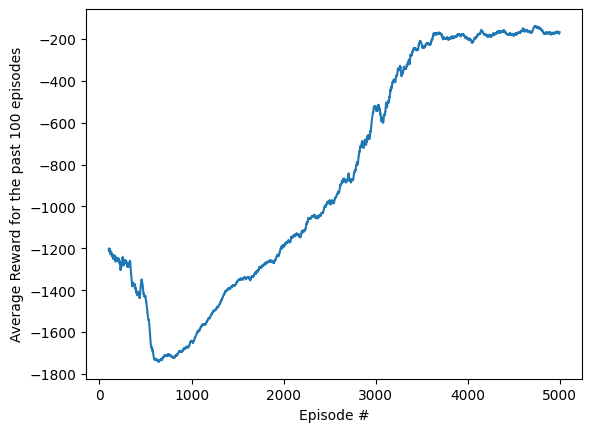

In [17]:
episode_rew_ddpg = env.get_episode_rewards()
episode_rew_ddpg_ma = (np.convolve(episode_rew_ddpg, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_rew_ddpg)+1), episode_rew_ddpg_ma)
plt.ylabel('Average Reward for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

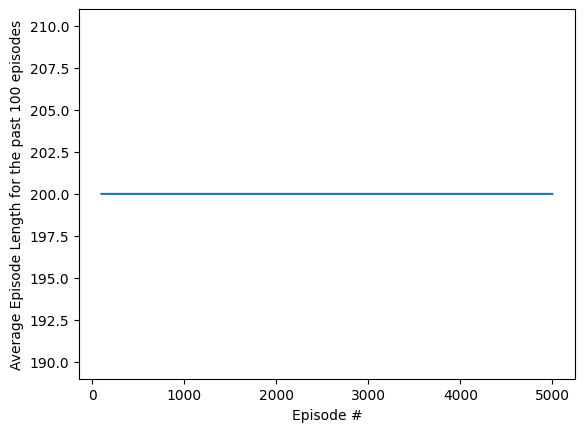

In [18]:
episode_len_ddpg = env.get_episode_lengths()
episode_len_ddpg_ma = (np.convolve(episode_len_ddpg, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_len_ddpg)+1), episode_len_ddpg_ma)
plt.ylabel('Average Episode Length for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

In [19]:
# Evaluate the final agent
eval_env = Monitor(gym.make("Pendulum-v1"))
mean_reward, std_reward = evaluate_policy(sac_model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Training steps: 100,000 || mean_reward={mean_reward:.2f} +/- {std_reward}")

Training steps: 100,000 || mean_reward=-138.15 +/- 88.1610960815993


In [20]:
import glob
import io
import base64
from IPython import display
from IPython.display import HTML
from gym.wrappers.monitoring import video_recorder
import torch

def show_video(video_name):
    mp4list = glob.glob('video/ex3/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/ex3/{}.mp4'.format(video_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(agent, env_name, video_name):
    env = gym.make(env_name, render_mode='rgb_array')
    vid = video_recorder.VideoRecorder(env, path="video/ex3/{}.mp4".format(video_name))
    state, _ = env.reset()
    done, truncated = False, False
    reward_list = []
    while not done and not truncated:
        frame = env.render()

        vid.capture_frame()
        # import pdb; pdb.set_trace()
        action = agent.predict(state)

        state, reward, done, truncated, _ = env.step(action[0])
        reward_list.append(reward)
    vid.close()
    env.close()
    print(np.array(reward_list).sum())

In [21]:
!mkdir video
!mkdir video/ex3

mkdir: video: File exists
mkdir: video/ex3: File exists


In [22]:
saved_model = SAC.load("./sac-Pendulum-v1-ex3.zip")

In [23]:
show_video_of_model(saved_model, "Pendulum-v1", 'SAC')
show_video('SAC')

/Users/keithwang/miniforge3_arm64/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


-249.93476688341673
